## Multiple Linear Regression
This python notebook makes use of multiple linear regression to study sales due to advertising by means of radio, newspaper and TV.

In [1]:
#Importing required modules and setting up the workspace
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

Loading the required data into a pandas dataframe and removing the unecessary column

In [2]:
ad = 'Advertising.csv'
advert = pd.read_csv(ad)

advert = advert.drop(columns=['Unnamed: 0'])
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


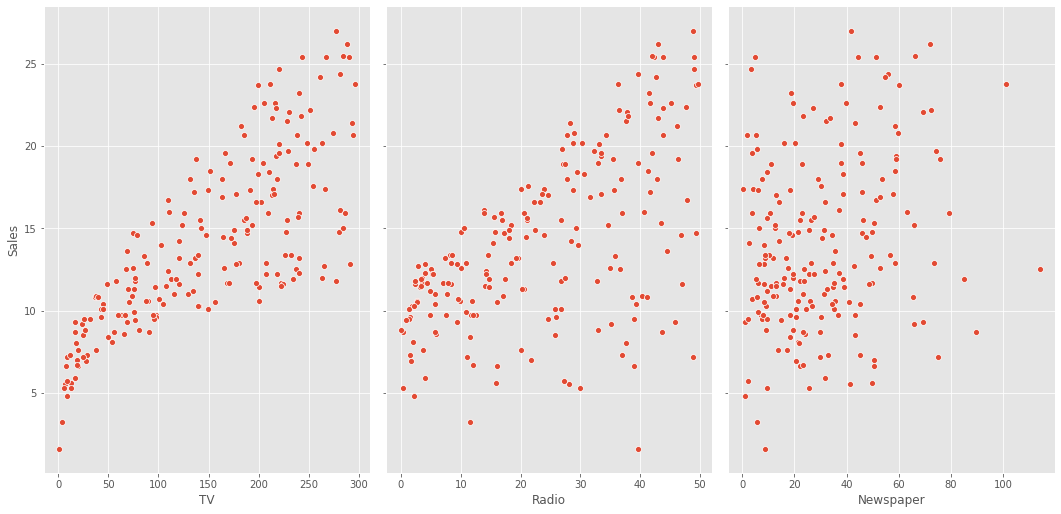

In [4]:
#plotting the data in a scatter plot to better understand each variables relationship to sales
sns.pairplot(advert, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales',
            height=7, aspect=0.7);

Creating a linear regression model and estimating the coefficients

In [5]:
from sklearn.linear_model import LinearRegression

x = advert[['TV', 'Radio', 'Newspaper']]
y= advert.Sales

lm1 = LinearRegression()
lm1.fit(x,y)

print(lm1.intercept_)
print(lm1.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [6]:
list(zip(['TV', 'Radio', 'Newspaper'], lm1.coef_))

[('TV', 0.045764645455397615),
 ('Radio', 0.18853001691820456),
 ('Newspaper', -0.0010374930424763272)]

Checking the correlation of the variables by means of a heatmap to better understand the relationship between variables

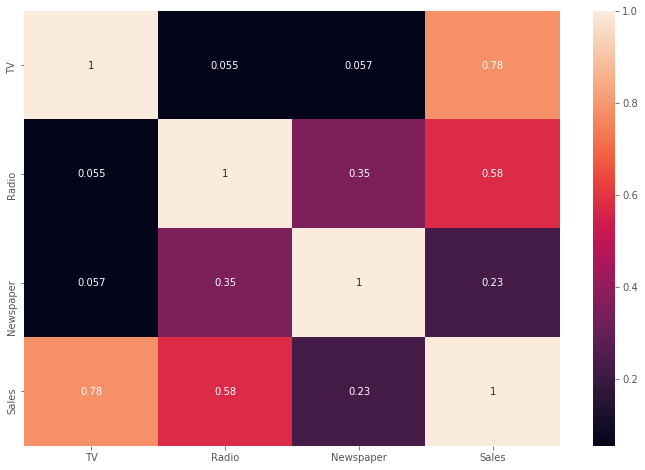

In [7]:
sns.heatmap(advert.corr(), annot=True)

With newspaper having such a low correlation to sales we create two linear regression models, one excluding newspaper and the other excluding. The R^2 score is then calculated for each case

In [8]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(x[['TV', 'Radio']], y)
lm2_pred = lm2.predict(x[['TV', 'Radio']])

print("R^2: ", r2_score(y, lm2_pred))

R^2:  0.8971942610828956


In [9]:
lm3 = LinearRegression().fit(x[['TV', 'Radio', 'Newspaper']], y)
lm3_pred = lm3.predict(x[['TV', 'Radio', 'Newspaper']])

print("R^2: ", r2_score(y, lm3_pred))

R^2:  0.8972106381789522


We then further evluate the model with test and training data and use the root mean squared error to calculate which if newspaper is a good variable to use for the model. We therefore split the test and training data and make two seperate linear regression models and use testing data to calculate accuracy.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = advert[['TV', 'Radio', 'Newspaper']]
y = advert.Sales

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

lm4 = LinearRegression().fit(x_train, y_train)
lm4_pred = lm4.predict(x_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm4_pred)))
print("R^2: ", r2_score(y_test, lm4_pred))

RMSE:  1.404651423032895
R^2:  0.9156213613792232


In [11]:
x = advert[['TV', 'Radio']]
y = advert.Sales

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

lm5 = LinearRegression().fit(x_train, y_train)
lm5_pred = lm5.predict(x_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm5_pred)))
print("R^2: ", r2_score(y_test, lm5_pred))

RMSE:  1.3879034699382886
R^2:  0.9176214942248908


From the results, it has shown the excluding newspaper makes the better model. We then visualise the linear regression model without the newspaper variable.

D:\Users\Matthew T\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


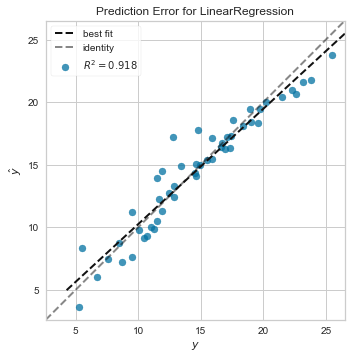

In [12]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm5).fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

We then try to develop this model further by adding another variable by making use of both the current TV and RADIO varibles. I achieve this by multiplying the two variables together to make a third variable. This is then used to create another linear regression model on which the results are observed.

In [13]:
advert['Interaction'] = advert['TV']*advert['Radio']
x = advert[['TV', 'Radio', 'Interaction']]
y = advert.Sales

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

lm6 = LinearRegression().fit(x_train, y_train)
lm6_pred = lm6.predict(x_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm6_pred)))
print("R^2: ", r2_score(y_test, lm6_pred))

RMSE:  0.7011871137164325
R^2:  0.9789736814681261


The evaluation shows that there has been an improvement in the model of performance due to this added parameter. We again visualise the model

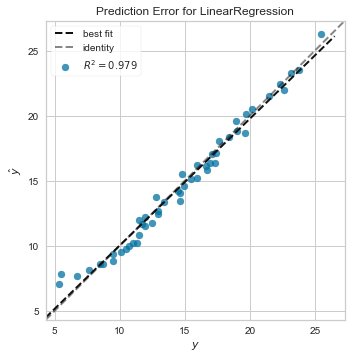

In [14]:
visualizer = PredictionError(lm6).fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

This model shows a much more accurate prediction in sales data from the TV and radio features